In [53]:
import fredapi as fa
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
fred = fa.Fred('3258cc777cc97a53229e08f54d9846c1')

In [54]:
credit = fred.get_series('DRCCLACBS')
credit.name = 'Delinquency Rate on Credit Card Loans' 
df = pd.DataFrame(credit)
df = df.reset_index() 
df['index'] = df['index'].dt.year
df

,index,Delinquency Rate on Credit Card Loans
0,1991,5.26
1,1991,5.48
2,1991,5.35
3,1991,5.32
4,1992,5.27
...,...,...
123,2021,1.57
124,2022,1.65
125,2022,1.85
126,2022,2.09


In [56]:
year = df.groupby(['index'])
df = round(year.mean(), 2)
df.tail()

,Delinquency Rate on Credit Card Loans
index,
2018,2.51
2019,2.58
2020,2.30
2021,1.64
2022,1.96


In [58]:
housing = fred.get_series('DRSFRMACBS')
housing.name = 'Delinquency Rate on Single-Family Residential Mortgages' 
df1 = pd.DataFrame(housing)
df1 = df1.reset_index() 
df1['index'] = df1['index'].dt.year
df1

,index,Delinquency Rate on Single-Family Residential Mortgages
0,1991,3.09
1,1991,3.17
2,1991,3.23
3,1991,3.29
4,1992,3.12
...,...,...
123,2021,2.27
124,2022,2.09
125,2022,1.96
126,2022,1.85


In [59]:
year = df1.groupby(['index'])
df1 = round(year.mean(), 2)
df1.tail()

,Delinquency Rate on Single-Family Residential Mortgages
index,
2018,3.13
2019,2.52
2020,2.62
2021,2.43
2022,1.92


In [63]:
df2 = pd.merge(df, df1, on='index')
df2.tail()

,Delinquency Rate on Credit Card Loans,Delinquency Rate on Single-Family Residential Mortgages
index,,
2018,2.51,3.13
2019,2.58,2.52
2020,2.30,2.62
2021,1.64,2.43
2022,1.96,1.92


In [65]:
df2.to_csv("Fred_data2.csv")

In [67]:
fred_data = pd.read_csv('Fred_data2.csv')
fred_data.tail()

,index,Delinquency Rate on Credit Card Loans,Delinquency Rate on Single-Family Residential Mortgages
27,2018,2.51,3.13
28,2019,2.58,2.52
29,2020,2.30,2.62
30,2021,1.64,2.43
31,2022,1.96,1.92


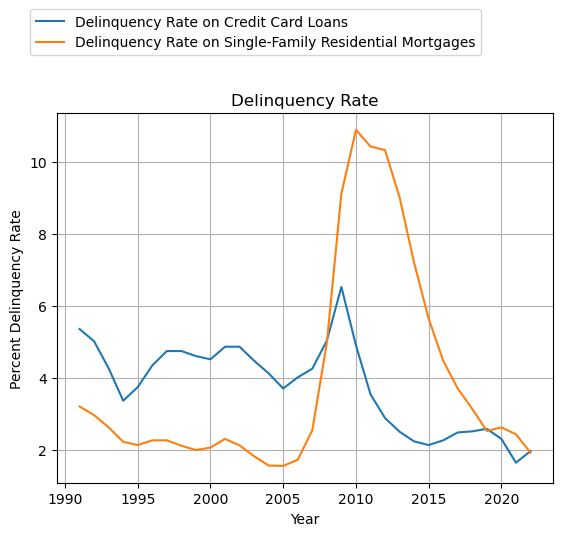

In [74]:
plt.plot(fred_data['index'], fred_data['Delinquency Rate on Credit Card Loans'], label='Delinquency Rate on Credit Card Loans')
plt.plot(fred_data['index'], fred_data['Delinquency Rate on Single-Family Residential Mortgages'], label='Delinquency Rate on Single-Family Residential Mortgages')
plt.xlabel('Year')
plt.ylabel('Percent Delinquency Rate')
plt.title('Delinquency Rate')
plt.legend(loc="upper center", bbox_to_anchor=(0.4, 1.3))
plt.grid()
plt.savefig("Delinquency Rate.png")
plt.show()